In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy import misc
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

In [4]:
import simulations as sim
import reconstruct_video as rv
reload(sim)
reload(rv)

<module 'reconstruct_video' from 'reconstruct_video.pyc'>

In [5]:
# generate the data
num_frame = 100
# video = sim.make_rotating_square(num_frame, 0.1, 180, sigma=0)
video = sim.cube_simulation(.5, 25, sigma = 0.5)

# format the data
vec_img = [f.reshape((1, -1)) for f in video]
X = np.concatenate(vec_img,axis = 0)

# Shuffle rows of X
#np.random.shuffle(X)

In [8]:
# apply isomap
n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=4).fit_transform(X)

# Reconstruct order of frames
frame_order = rv.greedy_reconstruct_frame_order(X_iso)

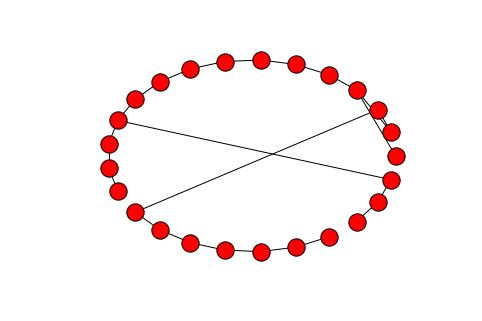

In [9]:
reload(rv)
import networkx as nx
G = rv.graph_reconstruct_frame_order(X_iso)
min_tree = nx.minimum_spanning_tree(G)
pos = nx.circular_layout(min_tree)
nx.draw(min_tree,pos)
plt.show()


0 111.178627198
1 108.159089546
2 218.468058578
4 26.0129796686
5 140.811983415
6 94.8113803516
7 295.573780849
8 357.999628815
9 438.779027594
10 527.903512512
11 584.855032709
12 726.913694841
13 867.730921532
14 1026.34186174
15 1035.83345973
16 827.021596512
17 777.559509558
18 592.874836464
19 386.326570708
20 311.189629265
21 470.810266151
22 800.825448896
23 715.172871764


(array([ 4.,  2.,  2.,  2.,  3.,  2.,  2.,  3.,  1.,  2.]),
 array([   26.01297967,   126.99502767,   227.97707568,   328.95912369,
          429.94117169,   530.9232197 ,   631.90526771,   732.88731571,
          833.86936372,   934.85141172,  1035.83345973]),
 <a list of 10 Patch objects>)

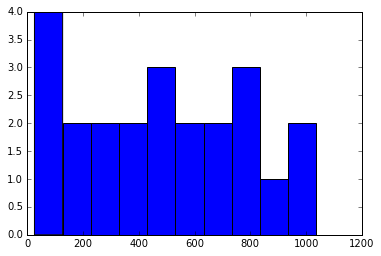

In [135]:
#print min_tree.edge
d = []
for i in range(0,24):
    if i not in [3]:
        d.append(G.get_edge_data(3,i)['weight'])
        print i,d[-1]
plt.hist(d)

In [85]:
# take only every 10th sample
X_iso = X_iso[1::5]
labels = range(0,num_frame)
labels = labels[1::5]

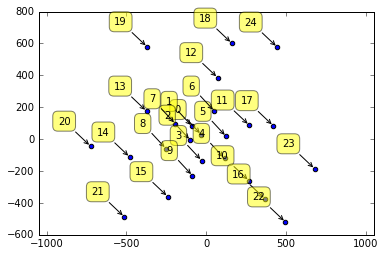

In [100]:
plt.scatter(X_iso[:,0], X_iso[:,1])
labels = range(0,25)
plt.axis('equal')
for label, x, y in zip(labels, X_iso[:, 0], X_iso[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


In [138]:
a = sim.cube_simulation(0.1, 100, sigma = 0.01)
from time import sleep

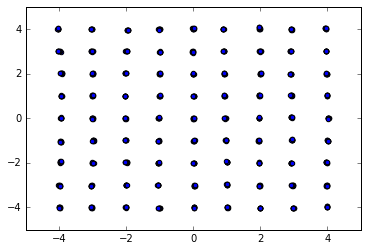

In [140]:
frame = a[0]
x = frame[:,0]
y = frame[:,1]
z = frame[:,2]
plt.scatter(x,y)


FPS: 59.5770012796


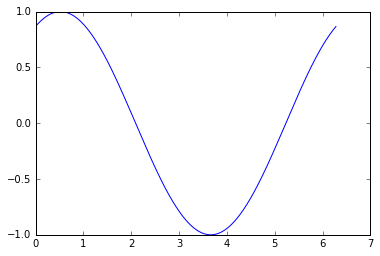

In [2]:
from pylab import *
import time

ion()

tstart = time.time()               # for profiling
x = arange(0,2*pi,0.01)            # x-array
line, = plot(x,sin(x))
for i in arange(1,200):
    line.set_ydata(sin(x+i/10.0))  # update the data
    draw()                         # redraw the canvas

print 'FPS:' , 200/(time.time()-tstart)